In [241]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from imblearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [242]:
import warnings
warnings.filterwarnings('ignore')

In [243]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6291,2890-WFBHU,Female,0,No,No,59,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),79.85,4786.1,No
996,6641-XRPSU,Female,0,No,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.00,2416.1,Yes
6030,2027-OAQQC,Female,0,No,No,43,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.05,2076.2,Yes
3964,2632-IVXVF,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),111.75,7511.3,No
433,2957-LOLHO,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.9,Yes


In [244]:
df.isnull().sum().max()

0

In [245]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [246]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [247]:
df.drop('customerID',axis='columns',inplace=True)

In [248]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [249]:
df.TotalCharges.values
#total charges are in string so converting it to float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [250]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#put NA in place of empty cells and check whether tha value is null

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [251]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
#showing rows where the isnull = TRUE in totalcharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [252]:
df.shape

(7043, 20)

In [253]:
df1 = df[df.TotalCharges!=' ']
#new dataset having empty cells removed
df1.shape

(7032, 20)

In [254]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [255]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
#converting object into string

In [256]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

**Data Visualization**

Text(0.5, 1.0, 'Class Distributions \n (Yes || No)')

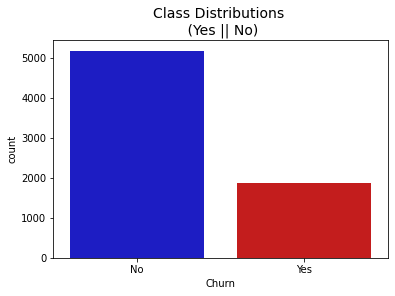

In [257]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Churn', data=df, palette=colors)
plt.title('Class Distributions \n (Yes || No)', fontsize=14)

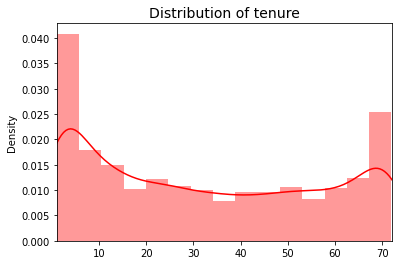

In [258]:
fig, ax= plt.subplots()


tenure_val = df1['tenure'].values

sns.distplot(tenure_val, color='r')
ax.set_title('Distribution of tenure', fontsize=14)
ax.set_xlim([min(tenure_val), max(tenure_val)])

plt.show()

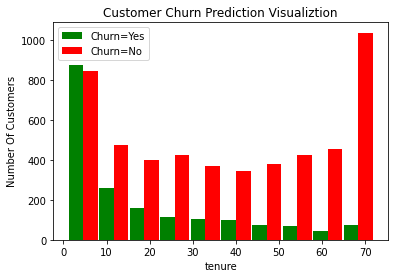

In [259]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

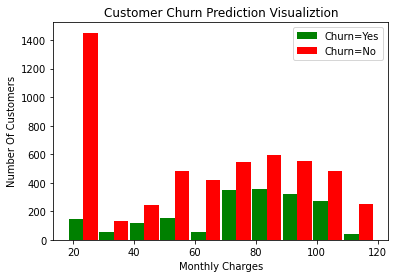

In [260]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [261]:
#to find out unique fields 
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [262]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [263]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [264]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [265]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [266]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [267]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [268]:
df1.gender.unique()

array([1, 0])

In [269]:
#One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [270]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5244,1,0,0,0,45,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
6547,0,1,1,0,68,0,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
3051,1,0,1,1,71,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3568,1,0,0,0,21,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4438,0,0,1,1,51,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [271]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [272]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [273]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [274]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [275]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [276]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [277]:
5163/1869

2.7624398073836276

In [278]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [279]:
X_train.shape

(5625, 26)

In [280]:
X_test.shape

(1407, 26)

In [281]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [282]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [283]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [284]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [285]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7609
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7925
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8062
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accura

### Method 1: Undersampling

In [286]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [287]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [288]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [289]:
# Number of classes in training Data
y_train1.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [290]:
y_preds1 = ANN(X_train1, y_train1, X_test1, y_test1, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6391
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7579
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7622
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7575
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7642
Epoch 11/

### Method2: Oversampling

In [291]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [292]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [293]:
# Number of classes in training Data
y_train2.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [294]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds2 = ANN(X_train2, y_train2, X_test2, y_test2, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7393
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7553
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7603
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7644
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7630
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7702
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7703
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7706
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7769
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4646 - accura

### Method3: SMOTE

In [295]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [296]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [297]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [298]:
# Number of classes in training Data
y_train3.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [299]:
y_preds3 = ANN(X_train3, y_train3, X_test3, y_test3, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7419
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7749
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7775
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7788
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7839
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7874
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7913
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7925
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7944
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4340 - accura

### Method4: Use of Ensemble with undersampling

In [300]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [301]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [302]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [303]:
y_train4.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [304]:
df3 = X_train4.copy()
df3['Churn'] = y_train4

In [305]:
df3.head()  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [306]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [307]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train4 = df_train.drop('Churn', axis='columns')
    y_train4 = df_train.Churn
    return X_train4, y_train4    

In [308]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6600 - accuracy: 0.6284
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.7495
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7676
Epoch 11/

In [309]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6617 - accuracy: 0.6147
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7776
Epoch 11/

In [310]:
X_train4, y_train4 = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6237 - accuracy: 0.6808
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7696
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7734
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7765
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7772
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7776
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7814
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7837
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7863
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7867
Epoch 11/

In [311]:
len(y_pred1)

1407

In [312]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [313]:
cl_rep = classification_report(y_test4, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



****

###Method 5 : Borderline SMOTE 1

In [314]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [315]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X, y)

y_bs.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [316]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_bs, y_bs, test_size=0.2, random_state=15, stratify=y_bs)

In [317]:
# Number of classes in training Data
y_train5.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [318]:
y_preds5 = ANN(X_train5, y_train5, X_test5, y_test5, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7178
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7585
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7682
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7715
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7735
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7768
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7820
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7816
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7820
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4506 - accura

###Method 6: Borderline SMOTE 2

In [319]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [320]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-2')
X_bsm, y_bsm = bsmote.fit_resample(X, y)

y_bsm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [321]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_bsm, y_bsm, test_size=0.2, random_state=15, stratify=y_bsm)

In [322]:
# Number of classes in training Data
y_train6.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [323]:
y_preds6 = ANN(X_train6, y_train6, X_test6, y_test6, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.6978
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7874
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7967
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.7959
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8038
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8084
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8088
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8119
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3879 - accura

###Method 7 : SVMSmote

In [324]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [325]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)
X_svm, y_svm = svmsmote.fit_resample(X, y)

y_svm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [326]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=15, stratify=y_svm)

In [327]:
y_train7.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [328]:
y_preds7 = ANN(X_train7, y_train7, X_test7, y_test7, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7680
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7822
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7841
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7873
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7920
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7973
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7977
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8010
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8015
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4288 - accura

###Method 8 : ADASYN

In [329]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [330]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state = 42)
X_ada, y_ada = ada.fit_resample(X, y)

y_ada.value_counts()

1    5192
0    5163
Name: Churn, dtype: int64

In [331]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_ada, y_ada, test_size=0.2, random_state=15, stratify=y_ada)

In [332]:
y_train8.value_counts()

1    4154
0    4130
Name: Churn, dtype: int64

In [333]:
y_preds8 = ANN(X_train8, y_train8, X_test8, y_test8, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5867 - accuracy: 0.6843
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7464
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7530
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7552
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7583
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7653
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7682
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7745
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7811
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4532 - accura

###Method 9 : SMOTEENN

In [334]:
from imblearn.combine import SMOTEENN

In [335]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [336]:

enn = SMOTEENN(sampling_strategy='minority',random_state = 42)
X_smt, y_smt = enn.fit_resample(X, y)

y_smt.value_counts()

1    3453
0    2800
Name: Churn, dtype: int64

In [337]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [338]:
y_train9.value_counts()

1    2762
0    2240
Name: Churn, dtype: int64

In [339]:
y_preds9 = ANN(X_train9, y_train9, X_test9, y_test9, 'binary_crossentropy', -1)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.8161
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9080
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9108
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9140
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9174
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9190
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9198
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9256
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9244
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.1716 - accura

###Method 10 : SMOTETomek

In [340]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [341]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(sampling_strategy='minority',random_state = 42)
X_smtt, y_smtt = smotetomek.fit_resample(X, y)

y_smtt.value_counts()

0    4873
1    4873
Name: Churn, dtype: int64

In [342]:
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_smtt, y_smtt, test_size=0.2, random_state=15, stratify=y_smtt)

In [343]:
y_train10.value_counts()

1    3898
0    3898
Name: Churn, dtype: int64

In [344]:
y_preds10 = ANN(X_train10, y_train10, X_test10, y_test10, 'binary_crossentropy', -1)

Epoch 1/100
244/244 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.7513
Epoch 2/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7958
Epoch 3/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7998
Epoch 4/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8041
Epoch 5/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8032
Epoch 6/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8039
Epoch 7/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8062
Epoch 8/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8130
Epoch 9/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8118
Epoch 10/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4063 - accura

###Confusion Matrix for all algorithms

In [348]:
import seaborn as sn 



ANN Algotithm
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      1033
         1.0       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407

1 : Undersampling
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       374
           1       0.74      0.76      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748

2 : Oversampling
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1033
           1       0.75      0.85      0.80      1033

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79  

Text(69.0, 0.5, 'Truth')

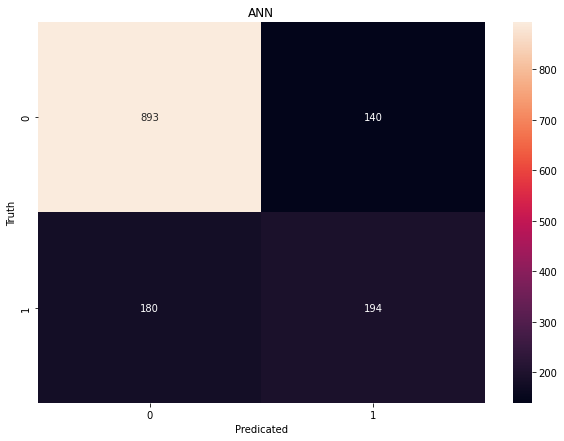

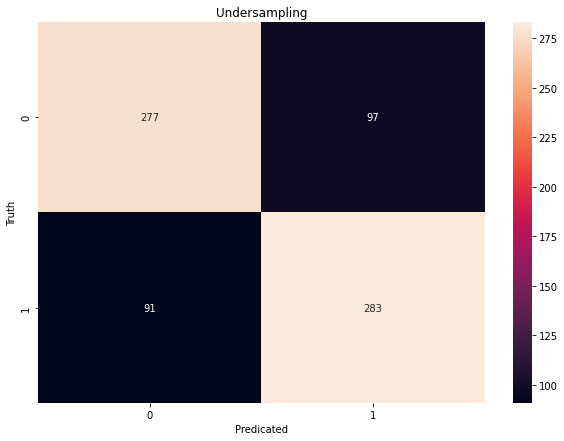

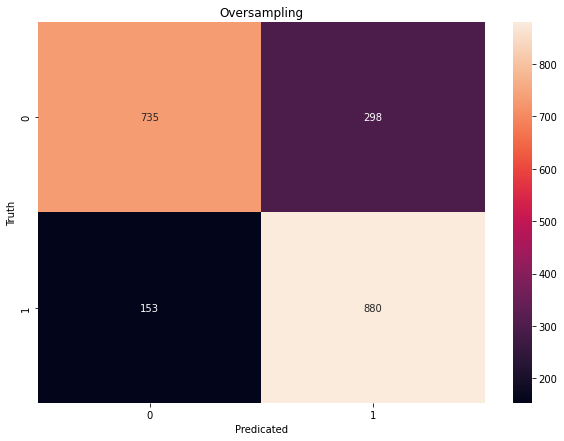

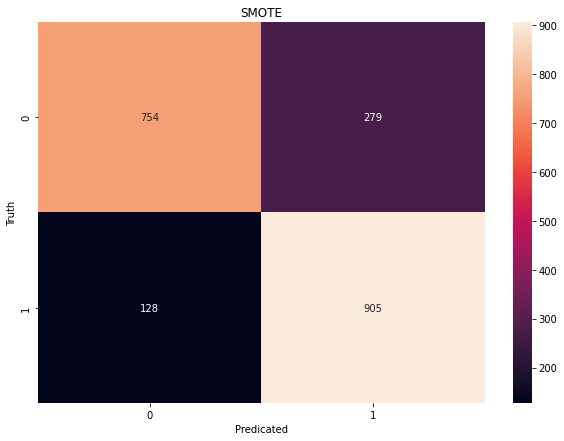

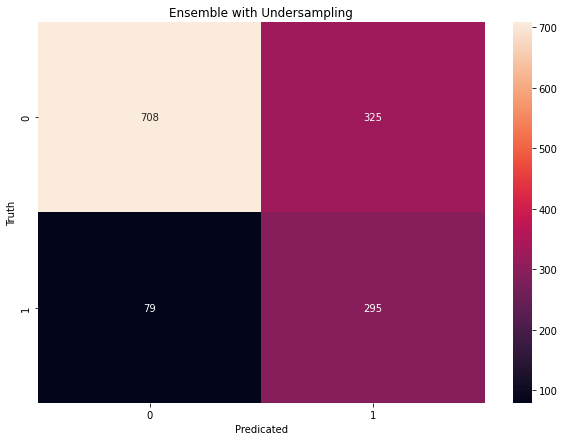

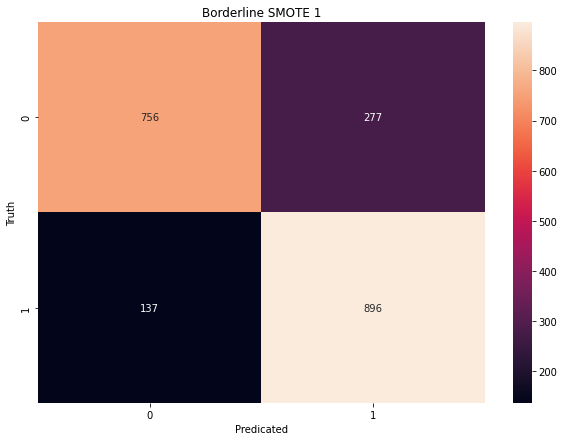

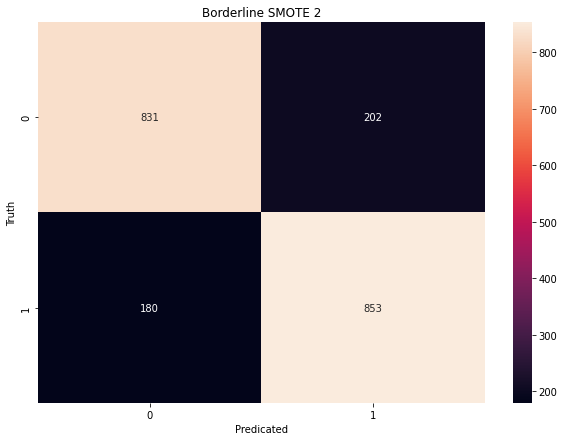

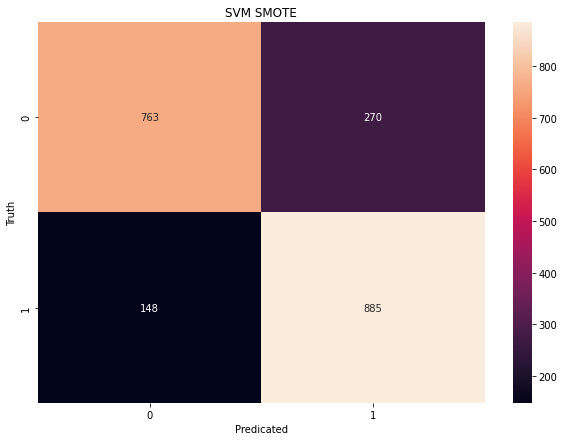

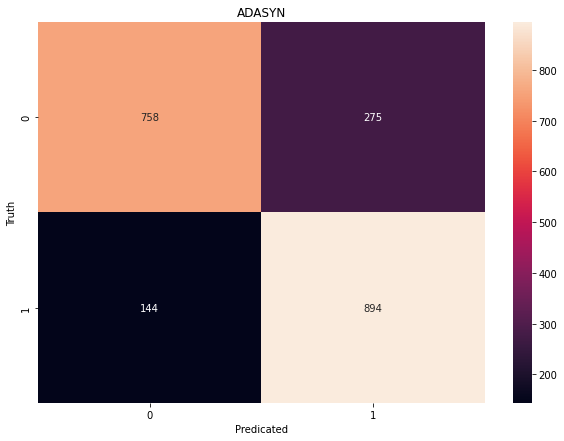

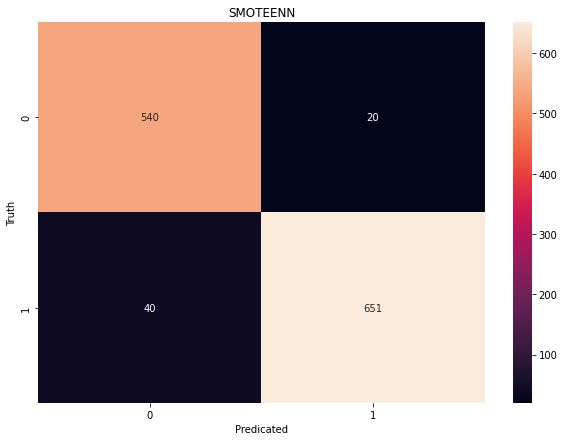

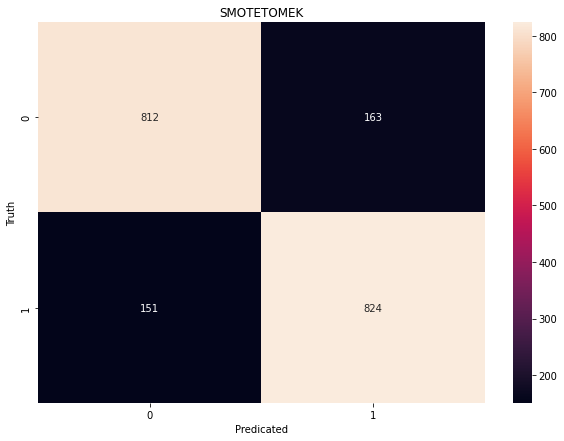

In [355]:
print("ANN Algotithm")
print(classification_report(y_test, y_preds))
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ANN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("1 : Undersampling")
print(classification_report(y_test1, y_preds1))
cm=tf.math.confusion_matrix(labels=y_test1,predictions=y_preds1)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Undersampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("2 : Oversampling")
print(classification_report(y_test2, y_preds2))
cm=tf.math.confusion_matrix(labels=y_test2,predictions=y_preds2)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Oversampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("3 : SMOTE")
print(classification_report(y_test3, y_preds3))
cm=tf.math.confusion_matrix(labels=y_test3,predictions=y_preds3)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("4 : Ensemble with Undersampling")
print(classification_report(y_test4, y_pred_final))
cm=tf.math.confusion_matrix(labels=y_test4,predictions=y_pred_final)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Ensemble with Undersampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("5 : Borderline SMOTE 1")
print(classification_report(y_test5, y_preds5))
cm=tf.math.confusion_matrix(labels=y_test5,predictions=y_preds5)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 1')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("6 : Borderline SMOTE 2")
print(classification_report(y_test6, y_preds6))
cm=tf.math.confusion_matrix(labels=y_test6,predictions=y_preds6)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 2')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("7 : SVM SMOTE")
print(classification_report(y_test7, y_preds7))
cm=tf.math.confusion_matrix(labels=y_test7,predictions=y_preds7)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SVM SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("8 : ADASYN ")
print(classification_report(y_test8, y_preds8))
cm=tf.math.confusion_matrix(labels=y_test8,predictions=y_preds8)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ADASYN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("9 : SMOTEENN ")
print(classification_report(y_test9, y_preds9))
cm=tf.math.confusion_matrix(labels=y_test9,predictions=y_preds9)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SMOTEENN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("10 : SMOTETOMEK ")
print(classification_report(y_test10, y_preds10))
cm=tf.math.confusion_matrix(labels=y_test10,predictions=y_preds10)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SMOTETOMEK')
plt.xlabel('Predicated')
plt.ylabel('Truth')